<a href="https://colab.research.google.com/github/crypticBard/Penguin-Species-Classifier/blob/main/TF_DecisionForest_penguin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow_decision_forests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 65.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
  Attempting uninstal

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_decision_forests as tfdf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder

In [6]:
#loading the dataset
data=sns.load_dataset("penguins")

In [7]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [8]:
#removing the problmeatic rows
data.dropna(inplace=True)

In [9]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [11]:
#selecting only the categorical data for encoding later
categorical_cols=data.select_dtypes(include=('object','category')).columns

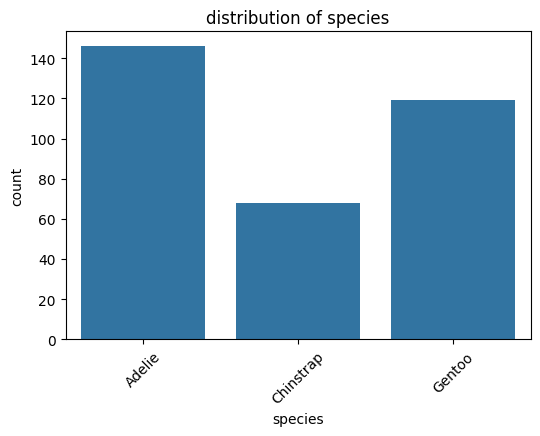

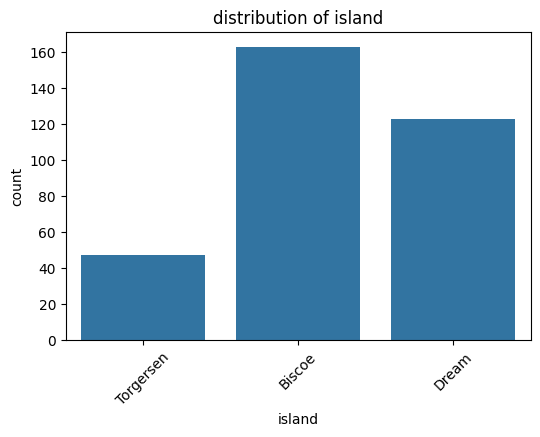

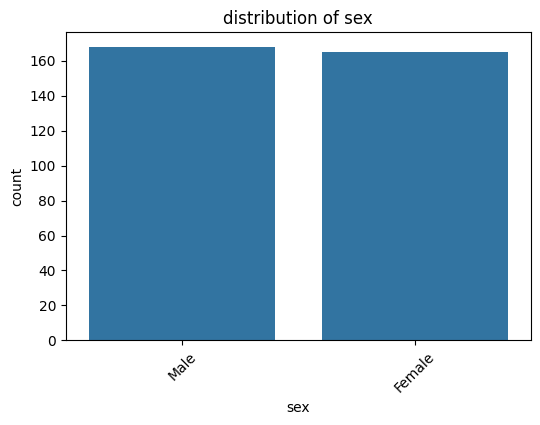

In [12]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=data,x=col)
    plt.title(f"distribution of {col}")
    plt.xticks(rotation=45)

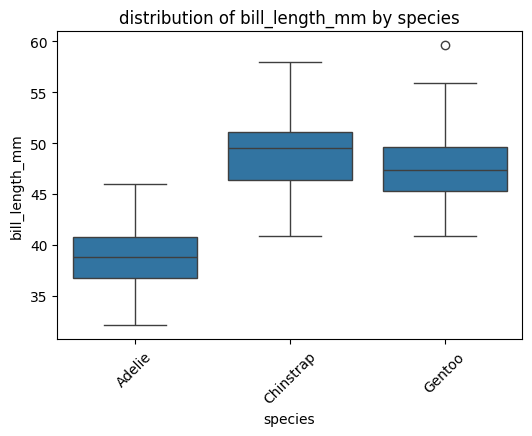

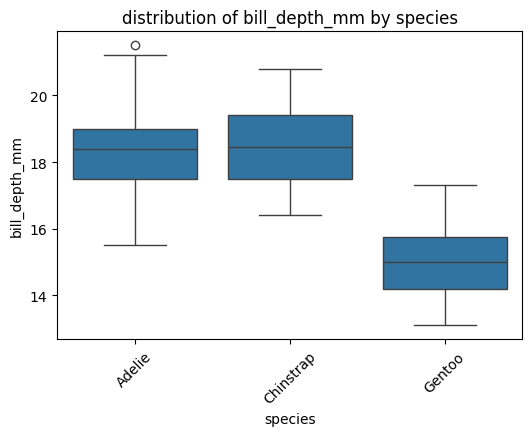

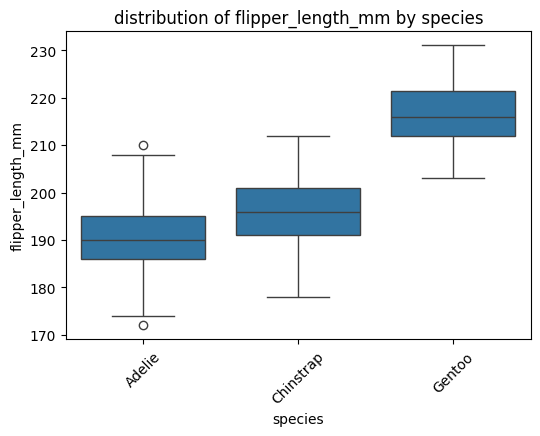

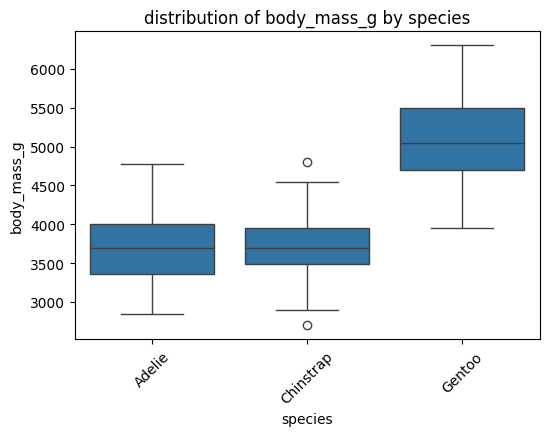

In [13]:
#separating numeric and categorical data
numeric_features=data.select_dtypes(include=["int","float64"]).columns

#box plot really helps us see the difference b/w the species
for feature in numeric_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="species",y=feature,data=data)
    plt.title(f"distribution of {feature} by species")
    plt.xlabel("species")
    plt.ylabel(feature)
    plt.xticks(rotation=45)
    plt.show()

In [14]:
#creates sepearate label encoders for each categorical variable
species_encoder=LabelEncoder()
island_encoder=LabelEncoder()
sex_encoder=LabelEncoder()

#encode with categorical variable
data["species"]=species_encoder.fit_transform(data["species"])
data["island"]=island_encoder.fit_transform(data["island"])
data["sex"]=sex_encoder.fit_transform(data["sex"])

#mapping the encoded values for later reference
species_mapping=dict(zip(species_encoder.classes_,range(len(species_encoder.classes_))))
island_mapping=dict(zip(island_encoder.classes_,range(len(island_encoder.classes_))))
sex_mapping=dict(zip(sex_encoder.classes_,range(len(sex_encoder.classes_))))

In [15]:
#splitting data into traina and test
train_data,test_data=train_test_split(data,test_size=0.3,random_state=33)

#convert to tensorflow
train_ds=tfdf.keras.pd_dataframe_to_tf_dataset(train_data,label="species")
test_ds=tfdf.keras.pd_dataframe_to_tf_dataset(test_data,label="species")

#creating model
model=tfdf.keras.RandomForestModel()
model.fit(train_ds,verbose=2)

Use /tmp/tmpl39he0jh as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'island': <tf.Tensor 'data:0' shape=(None,) dtype=int64>, 'bill_length_mm': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'bill_depth_mm': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'flipper_length_mm': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'body_mass_g': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'sex': <tf.Tensor 'data_5:0' shape=(None,) dtype=int64>}
Label: Tensor("data_6:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'island': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'bill_length_mm': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'bill_depth_mm': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'flipper_length_mm':

I0000 00:00:1742763192.431094     166 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1742763192.431168     166 kernel.cc:783] Collect training examples
I0000 00:00:1742763192.431195     166 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1742763192.431856     166 kernel.cc:401] Number of batches: 1
I0000 00:00:1742763192.431885     166 kernel.cc:402] Number of examples: 233
I0000 00:00:1742763192.431957     166 kernel.cc:802] Training dataset:
Number of records: 233
Number of columns: 7

Number of columns by type:
	NUMERICAL: 6 (85.7143%)
	CATEGORICAL: 1 (14.2857%)

Columns:

NUMERICAL: 6 (85.7143%)
	1: "bill_depth_mm" NUMERICAL m

Model trained in 0:00:00.146074
Compiling model...
Model compiled.


In [16]:
#get an inspector to access model internals
inspector=model.make_inspector()

#Display feature importance
importance_types=inspector.variable_importances().keys()

for importance_type in importance_types:
    print("\n"+"="*30)
    print(f"importance_type= {importance_type}")
    print("-"*30)
    importances=inspector.variable_importances()[importance_type]
    #sort importances in descending order based on importance value
    sorted_importances=sorted(importances,key= lambda x: x[1],reverse=True)
    #Setup formatting for consistent spacing inthe output
    for feature,importance in sorted_importances:
        feature_name=feature.name if isinstance(feature,tfdf.py_tree.dataspec.SimpleColumnSpec) else feature
        print(f"{feature_name:20} {importance:.4f}")



importance_type= INV_MEAN_MIN_DEPTH
------------------------------
bill_length_mm       0.4880
flipper_length_mm    0.4449
bill_depth_mm        0.3131
island               0.2977
body_mass_g          0.2804
sex                  0.2473

importance_type= NUM_AS_ROOT
------------------------------
flipper_length_mm    154.0000
bill_length_mm       109.0000
bill_depth_mm        35.0000
body_mass_g          1.0000
island               1.0000

importance_type= SUM_SCORE
------------------------------
bill_length_mm       28521.7698
flipper_length_mm    22982.3645
bill_depth_mm        8013.1938
island               7897.9928
body_mass_g          2828.0704
sex                  241.6692

importance_type= NUM_NODES
------------------------------
bill_length_mm       608.0000
bill_depth_mm        418.0000
body_mass_g          304.0000
flipper_length_mm    290.0000
island               199.0000
sex                  24.0000


In [17]:
test_predictions=model.predict(test_ds)
predicted_labels=np.argmax(test_predictions,axis=1)#label with max probability
predicted_labels

1/1 [==============================] - 0s 39ms/step


array([1, 2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 1, 2, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 0,
       1, 2, 1, 0, 1, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2])

In [18]:
test_labels=test_data["species"].values
test_labels

array([1, 2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 1, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 0,
       1, 2, 1, 0, 1, 0, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2])

In [19]:
#accuracy of score
accuracy=accuracy_score(predicted_labels,test_labels)
print(f"accuracy={accuracy:.2f}")
#confusion matrix
cfm=confusion_matrix(test_labels,predicted_labels)
print("\n confusion matrix")
print(cfm)

#Calculate and print classification report
species_names=species_encoder.classes_
report=classification_report(test_labels,predicted_labels,target_names=species_names)
print("\n classification report")
print(report)


accuracy=0.96

 confusion matrix
[[38  1  0]
 [ 2 16  0]
 [ 0  1 42]]

 classification report
              precision    recall  f1-score   support

      Adelie       0.95      0.97      0.96        39
   Chinstrap       0.89      0.89      0.89        18
      Gentoo       1.00      0.98      0.99        43

    accuracy                           0.96       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.96      0.96      0.96       100

